# Esame Finale Python
1. Si richiede di verificare le dimensioni del dataset e i relativi metadati
2. Si chiede di trovare, per ogni continente:
   a. il numero di casi fin dall'inizio della pandemia
   b. la percentuale rispetto al totale mondiale del numero di casi
3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
   a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
   b. il numero di nuovi casi rispetto alla data; poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni
4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso) a. scrivere un breve commento a riguardo
5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023: a. mostrare la somma dei pazienti ospitalizzati per ognuna b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [1]:
# Importo le librerie
import pandas as pd
import numpy as np
import math as m
from matplotlib import pyplot as plt
import seaborn as sns
import bs4
import requests

In [2]:
df = pd.read_csv('owid-covid-data.csv')

# 1. Dimensioni dataset e metadati

In [3]:
df.shape

(429435, 67)

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

## Casting colonna 'date' da object a datetime

Verifica della modifica tramite .info()

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 non-null  float64      

## Analisi colonne numeriche e categoriche, ivi la presenza di dati nulli o mancanti

In [8]:
df.describe()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,429435,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,2022-04-21 01:06:25.463691008,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,2021-03-05 00:00:00,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,2022-04-20 00:00:00,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,2023-06-08 00:00:00,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,2024-08-14 00:00:00,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000
std,NaN,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769


In [9]:
for column in df.columns:
    # verifica della tipologia di dato:
    if df[column].dtype == 'object':
        print(f'{column} containts categorical data')
        # si conta quanti dati unici ci sono
        unique_count = df[column].nunique()
        print(f'{column} contains {unique_count} unique values')
        # frequenza
        all_count = df[column].value_counts()
        print(f'La distribuzione dei dati è la seguente: {all_count}')

iso_code containts categorical data
iso_code contains 255 unique values
La distribuzione dei dati è la seguente: iso_code
OWID_HIC    3026
OWID_EUN    3024
OWID_UMC    3013
OWID_LMC    2983
OWID_LIC    2724
            ... 
OWID_SCT    1305
OWID_WLS    1198
MAC          795
OWID_CYN     691
ESH            1
Name: count, Length: 255, dtype: int64
continent containts categorical data
continent contains 6 unique values
La distribuzione dei dati è la seguente: continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
South America    23440
Name: count, dtype: int64
location containts categorical data
location contains 255 unique values
La distribuzione dei dati è la seguente: location
High-income countries            3026
European Union (27)              3024
Upper-middle-income countries    3013
Lower-middle-income countries    2983
Low-income countries             2724
                                 ... 
Scotland       

In [7]:
for column in df.columns:
    nan_count = df[column].isna().sum()
    nan_percentage = round((nan_count/df.shape[0]) * 100, 2)
    if nan_count > 0:
        print(f'{column} has {nan_count} NaN values, that is the {nan_percentage} % of the total rows.')

continent has 26525 NaN values, that is the 6.18 % of the total rows.
total_cases has 17631 NaN values, that is the 4.11 % of the total rows.
new_cases has 19276 NaN values, that is the 4.49 % of the total rows.
new_cases_smoothed has 20506 NaN values, that is the 4.78 % of the total rows.
total_deaths has 17631 NaN values, that is the 4.11 % of the total rows.
new_deaths has 18827 NaN values, that is the 4.38 % of the total rows.
new_deaths_smoothed has 20057 NaN values, that is the 4.67 % of the total rows.
total_cases_per_million has 17631 NaN values, that is the 4.11 % of the total rows.
new_cases_per_million has 19276 NaN values, that is the 4.49 % of the total rows.
new_cases_smoothed_per_million has 20506 NaN values, that is the 4.78 % of the total rows.
total_deaths_per_million has 17631 NaN values, that is the 4.11 % of the total rows.
new_deaths_per_million has 18827 NaN values, that is the 4.38 % of the total rows.
new_deaths_smoothed_per_million has 20057 NaN values, that i

## Considerazione sulla presenza di Nan e valori nulli

La mancata presenza di valori nella colonna 'continent' identifica un possibile problema di registrazione dei dati. Attraverso una ricognizione per identificicare i valori unici presenti nelle colonne identificative dei paesi e dei continenti risulta che vi siano delle aggregazioni di dati per continente già presenti nel dataframe, così come la presenza del valore 'World' tra i valori di 'location'. Ciò comporta una pulizia preliminare det dataframe prima di procedere all'analisi richiesta.

In [11]:
unique_iso_codes = df['iso_code'].unique()
print(f'Elenco di iso_code unici: {unique_iso_codes}')

Elenco di iso_code unici: ['AFG' 'OWID_AFR' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'AIA' 'ATG' 'ARG' 'ARM'
 'ABW' 'OWID_ASI' 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL'
 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BES' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR'
 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV' 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL'
 'COM' 'COG' 'COK' 'CRI' 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'COD' 'DNK'
 'DJI' 'DMA' 'DOM' 'TLS' 'ECU' 'EGY' 'SLV' 'OWID_ENG' 'GNQ' 'ERI' 'EST'
 'SWZ' 'ETH' 'OWID_EUR' 'OWID_EUN' 'FRO' 'FLK' 'FJI' 'FIN' 'FRA' 'GUF'
 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GLP' 'GUM'
 'GTM' 'GGY' 'GIN' 'GNB' 'GUY' 'HTI' 'OWID_HIC' 'HND' 'HKG' 'HUN' 'ISL'
 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR' 'ITA' 'JAM' 'JPN' 'JEY' 'JOR'
 'KAZ' 'KEN' 'KIR' 'OWID_KOS' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR'
 'LBY' 'LIE' 'LTU' 'OWID_LIC' 'OWID_LMC' 'LUX' 'MAC' 'MDG' 'MWI' 'MYS'
 'MDV' 'MLI' 'MLT' 'MHL' 'MTQ' 'MRT' 'MUS' 'MYT' 'MEX' 'FSM' 'MDA' 'MCO'
 'MNG' 'MNE' 'MSR' 'MAR' 'MOZ' 'MM

In [12]:
unique_locations = df['location'].unique()
print(f'Elenco di location uniche: {unique_locations}')

Elenco di location uniche: ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Europe' 'European Union (27)' 'Faroe Islands' 'Falkland Islands' 'Fiji'
 'Finland' '

In [14]:
unique_continents = df['continent'].unique()
print(f'Elenco di continent uniche: {unique_continents}')

Elenco di continent uniche: ['Asia' nan 'Europe' 'Africa' 'Oceania' 'North America' 'South America']


# 2. Casi totali per continente e percentuale sul totale

## Pulizia dataframe per l'analisi

In [15]:
df_cleaned = df.dropna(subset=['continent'])

Verifica della presenza di sole nazioni/stati e non di aggregazioni (tipo EU 27, Europe, Africa etc...)

In [16]:
unique_locations = df_cleaned['location'].unique()
print(f'Elenco di location uniche: {unique_locations}')

Elenco di location uniche: ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Guiana' 'French Polynesia' 'Gab

## Verifica presenza valori nulli

Avendo operato la pulizia sulla colonna continente, questa non risulta più contenere valori nulli, tuttavia risultano ancora più di 11000 valori nulli per la colonna total_cases.

In [17]:
for column in df.columns:
    nan_count = df_cleaned[column].isna().sum()
    nan_percentage = round((nan_count/df.shape[0]) * 100, 2)
    if nan_count > 0:
        print(f'{column} has {nan_count} NaN values, that is the {nan_percentage} % of the total rows.')

total_cases has 11194 NaN values, that is the 2.61 % of the total rows.
new_cases has 12839 NaN values, that is the 2.99 % of the total rows.
new_cases_smoothed has 14009 NaN values, that is the 3.26 % of the total rows.
total_deaths has 11194 NaN values, that is the 2.61 % of the total rows.
new_deaths has 12390 NaN values, that is the 2.89 % of the total rows.
new_deaths_smoothed has 13560 NaN values, that is the 3.16 % of the total rows.
total_cases_per_million has 11194 NaN values, that is the 2.61 % of the total rows.
new_cases_per_million has 12839 NaN values, that is the 2.99 % of the total rows.
new_cases_smoothed_per_million has 14009 NaN values, that is the 3.26 % of the total rows.
total_deaths_per_million has 11194 NaN values, that is the 2.61 % of the total rows.
new_deaths_per_million has 12390 NaN values, that is the 2.89 % of the total rows.
new_deaths_smoothed_per_million has 13560 NaN values, that is the 3.16 % of the total rows.
reproduction_rate has 219169 NaN value

## Analisi

Per poter ottenere la comparazione richiesta si deve calcolare il valore massimo presente nella colonna total_cases.

In [18]:
max_cases_by_country = df_cleaned.groupby('location')['total_cases'].max()
print(max_cases_by_country)


location
Afghanistan          235214.0
Albania              335047.0
Algeria              272139.0
American Samoa         8359.0
Andorra               48015.0
                       ...   
Wallis and Futuna      3760.0
Western Sahara            NaN
Yemen                 11945.0
Zambia               349842.0
Zimbabwe             266386.0
Name: total_cases, Length: 243, dtype: float64


In [19]:
total_cases_by_continent = df_cleaned.groupby('continent')['total_cases'].max()
print(total_cases_by_continent)

continent
Africa             4072765.0
Asia              99373219.0
Europe            38997490.0
North America    103436829.0
Oceania           11861161.0
South America     37511921.0
Name: total_cases, dtype: float64


Il totale dei casi mondiali è stato ricavato dai record etichetati come 'World' nel dataframe originale.
Considerato che il dataframe consegnato si ferma ad agosto 2024, il dato ricavato è compatibile con ciò che riporta il sito dell'OMS.

In [20]:
world_data = df[df['location'] == 'World']
world_data.total_cases.dropna()
total_cases_world = world_data.total_cases.max()
total_cases_world

775866783.0

In [21]:
percentage_by_continent = round((total_cases_by_continent/total_cases_world) * 100, 2)
print(percentage_by_continent)

continent
Africa            0.52
Asia             12.81
Europe            5.03
North America    13.33
Oceania           1.53
South America     4.83
Name: total_cases, dtype: float64


# 3. Analisi Italia 2022

In [22]:
filtro_italia = df_cleaned.loc[:, 'location'] == 'Italy'
filtro_inizio22 = df_cleaned.loc[:, 'date'] >= '2022-01-01'
filtro_fine22 = df_cleaned.loc[:, 'date'] <= '2022-12-31'
filtro_22 = filtro_inizio22 & filtro_fine22
filtro_italia_22 = filtro_italia & filtro_22
df_italia22 = df_cleaned.loc[filtro_italia_22]
df_italia22

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186002,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.3,12.99,8.06,2849.4834
186004,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186005,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186006,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186362,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186363,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186364,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186365,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


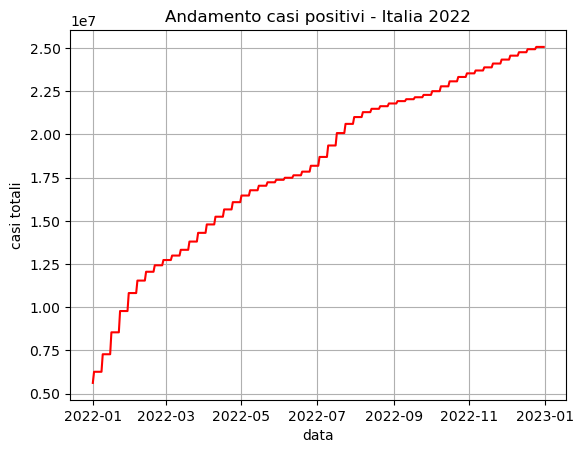

In [23]:
a = sns.lineplot(data = df_italia22, x = 'date', y = 'total_cases', color = 'red')
a.set(xlabel='data', ylabel='casi totali',
       title='Andamento casi positivi - Italia 2022')
a.grid()
plt.show()

L'andamento della curva del totale dei casi appare a gradini invece di essere continuo a causa della modalità della raccolta dei dati, infatti questi sono aggionrati settimanalmente.
Per una visione più chiara dell'andamento è possibile eliminare i valori duplicati.

In [24]:
df_italia22_cleaned = df_italia22.drop_duplicates(subset='total_cases')

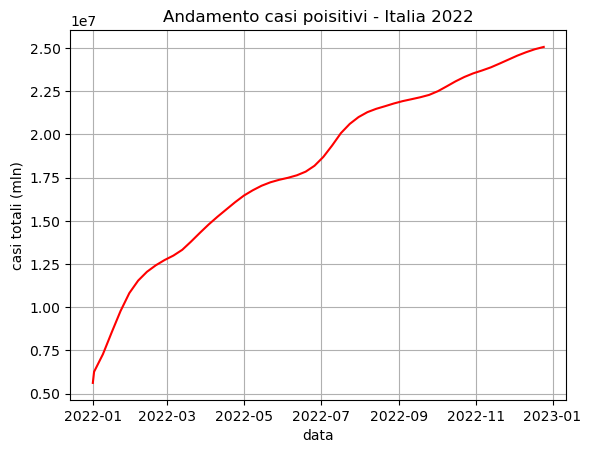

In [25]:
a = sns.lineplot(data = df_italia22_cleaned, x = 'date', y = 'total_cases', color = 'red')
a.set(xlabel='data', ylabel='casi totali (mln)', title='Andamento casi poisitivi - Italia 2022')

a.grid()
plt.show()

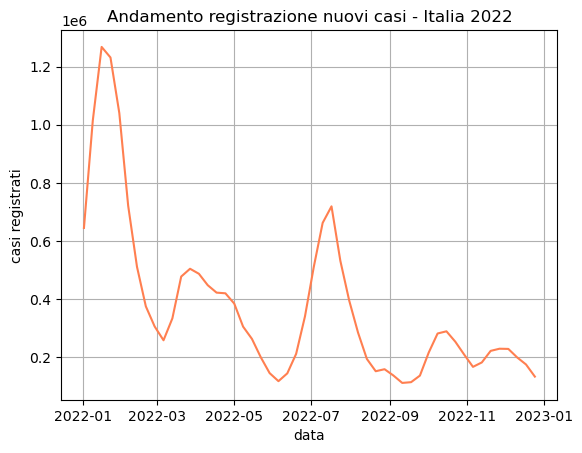

In [27]:
df_italia22_weekly = df_italia22[df_italia22.new_cases != 0]
df_italia22_weekly
a = sns.lineplot(data= df_italia22_weekly, x = 'date', y = 'new_cases', color = 'coral')
a.set(xlabel = 'data', ylabel = 'casi registrati', title = 'Andamento registrazione nuovi casi - Italia 2022')
a.grid()
plt.show()

# 4. Analisi comparativa Italia, Francia e Germania da maggio 2022 ad aprile 2023

In [28]:
filtro_italy= df_cleaned.loc[:, 'location'] == 'Italy' 
filtro_germany= df_cleaned.loc[:, 'location'] == 'Germany' 
filtro_france= df_cleaned.loc[:, 'location'] == 'France' 
filtro_country = filtro_italy | filtro_germany | filtro_france
filtro_may22 = df_cleaned.loc[:, 'date'] >= '2022-05-01'
filtro_april23 = df_cleaned.loc[:, 'date'] < '2023-05-01'
filtro2223 = filtro_may22 & filtro_april23
filtro_fig2223 = filtro_country & filtro2223
df_fig2223 = df_cleaned.loc[filtro_fig2223]

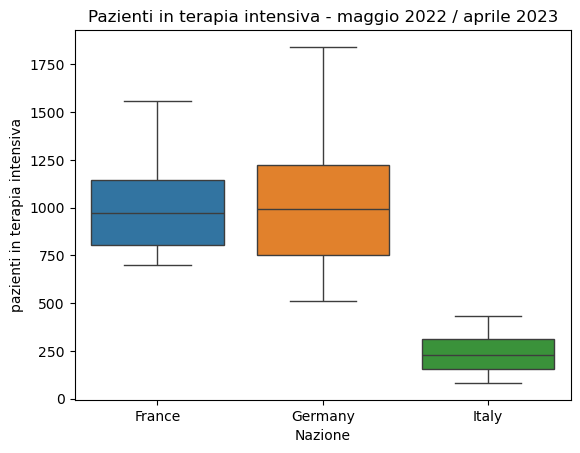

In [29]:
a = sns.boxplot(data = df_fig2223, x = 'location', y = 'icu_patients', hue = 'location')
a.set(xlabel='Nazione', ylabel='pazienti in terapia intensiva',
       title='Pazienti in terapia intensiva - maggio 2022 / aprile 2023')
plt.show()

## Commento:
Dal boxplot è possibile vedere come vi sia una maggiore ospedalizzazione nelle unità di terapia intensiva in Germania e Francia rispetto all'Italia.
Ciò è dovuto alla differenza nella registrazione dei casi di ospedalizzazione normale e di ospedalizzazione in terapia intensiva operata tra i diversi paesi. 
Ciò è emerso attraverso l'analisi della totalità degli ospedalizzati operata nel punto successivo.
La Germania non ha differenziato la registrazione degli accessi ospedalieri, infatti questi nel conteggio totale risultano a 0 (dato altamente improbabile).
Si veda l'analisi del punto successivo per una disamina più approfondita.

# 5. Analisi comparativa Italia, Francia, Germania e Spagna, 2023

In [30]:
filtro_spain = df_cleaned.loc[:, 'location'] == 'Spain'
filtro_country_1 = filtro_country | filtro_spain
filtro_2023_start = df_cleaned.loc[:, 'date'] >= '2023-01-01'
filtro_2023_end = df_cleaned.loc[:, 'date'] <= '2023-12-31'
filtro_2023 = filtro_2023_start & filtro_2023_end
filtro_analisi_5 = filtro_country_1 & filtro_2023
df_analisi_5 = df_cleaned.loc[filtro_analisi_5]
df_analisi_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 131459 to 364042
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    1460 non-null   object        
 1   continent                                   1460 non-null   object        
 2   location                                    1460 non-null   object        
 3   date                                        1460 non-null   datetime64[ns]
 4   total_cases                                 1460 non-null   float64       
 5   new_cases                                   927 non-null    float64       
 6   new_cases_smoothed                          927 non-null    float64       
 7   total_deaths                                1460 non-null   float64       
 8   new_deaths                                  927 non-null    float64       
 9   new_de

In [31]:
df_analisi_5.groupby('location').hosp_patients.sum()

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

In [32]:
df_analisi_5.loc[filtro_germany, 'hosp_patients']

141503   NaN
141504   NaN
141505   NaN
141506   NaN
141507   NaN
          ..
141863   NaN
141864   NaN
141865   NaN
141866   NaN
141867   NaN
Name: hosp_patients, Length: 365, dtype: float64

In [33]:
df_analisi_5.groupby('location').icu_patients.sum()

location
France      80049.0
Germany    124107.0
Italy       41534.0
Spain       20555.0
Name: icu_patients, dtype: float64

Attraverso il calcolo del totale delle ospedalizzazioni si evince come la Germania non abbia differenziato gli accessi ospedalieri durante il periodo pandemico.
Ciò comporta una analisi falsata del punto 4 dell'analisi richiesta.

La mancanza di dati delle ospedalizzazioni ordinarie per la Germania si può ovviare tramite i dati delle ammissioni settimanali presso gli ospedali, in questo caso anche per la Germania suddivise in ospedalizzazioni normali e in terapia intensiva.

In [40]:
weekly_hosp_adm = df_analisi_5.groupby('location').weekly_hosp_admissions.sum()
weekly_hosp_adm

location
France     268117.0
Germany    897776.0
Italy      592019.0
Spain      299463.0
Name: weekly_hosp_admissions, dtype: float64

In [35]:
weekly_icu_adm = df_analisi_5.groupby('location').weekly_icu_admissions.sum()
weekly_icu_adm

location
France     27631.0
Germany    95998.0
Italy      31595.0
Spain      16066.0
Name: weekly_icu_admissions, dtype: float64

In [36]:
differenza = weekly_hosp_adm - weekly_icu_adm
print(differenza)

location
France     240486.0
Germany    801778.0
Italy      560424.0
Spain      283397.0
dtype: float64


In [37]:
percentuale = round(weekly_icu_adm / weekly_hosp_adm * 100, 2)
print(percentuale)

location
France     10.31
Germany    10.69
Italy       5.34
Spain       5.36
dtype: float64
